# Part II - Ford GoBike Visualizations Presentations
## by Maicy Maritim


## Investigation Overview


> I wanted to look at the most common user behaviours in relation to the usage of the Ford GoBike Share System. This covers Time, Gender and Age of each user type



## Dataset Overview

> Ford GoBike is a bike share used in the San Fransisco Bay Area, it contains multiple specially designed and durable bikes that can be used with no time limits. It is designed to enhance sustainable transportation in the Bay Area.

> Ford GoBike is designed for the hilly landscape of San Franciscoand are therefore built specially to be comfortable and easy to ride.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
master_df = pd.read_csv('fordgo_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Day

> The bike sharing system is mainly used on the weekdays, with Thursday having the highest number of trips. There is a huge drop in the number of trips on the weekends. This suggests that the bike share system is primarily used for the purpose of commuting to and from work.


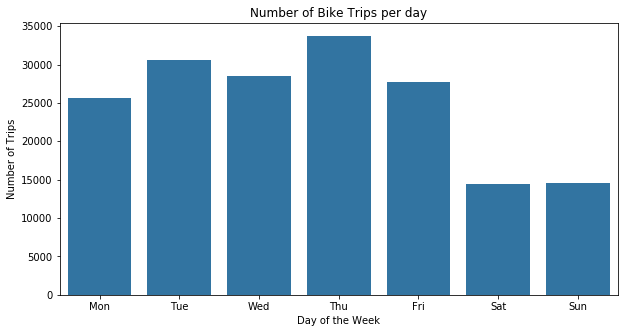

In [3]:
#Number of Bike trips per day
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
fig = (10, 5)

plt.figure(figsize = fig)
g = sb.countplot(data=master_df, x='start_day', color=base_color, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Bike Trips per day');

## Ford GoBike Usage By User Type

> Subscribers are the most frequent users of the Ford GoBike System on each day of the week.

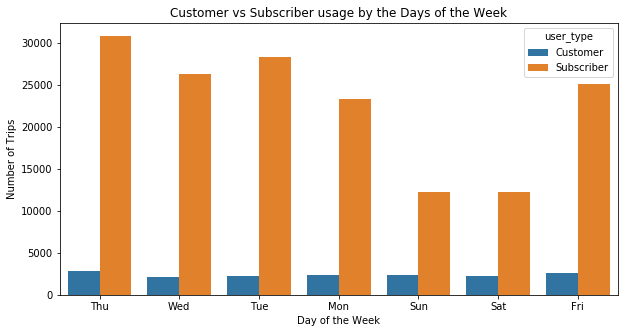

In [4]:
#User type usage by Month
plt.figure(figsize = fig)
sb.countplot(data=master_df, x='start_day', hue='user_type');
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Customer vs Subscriber usage by the Days of the Week");

## Daily Bike Trips per Subscribers' Age Group

> - Subscribers within the age group 28-37 are the most frequent user of the bike share system.
- Subscribers within the age group 68 - 99 are the least frequent users.
- Thursday has the highest number of users in each age group
- On the weekends, the number of bike rides drop significantly for most age groups except 68 - 99, which remains the same throughout the week


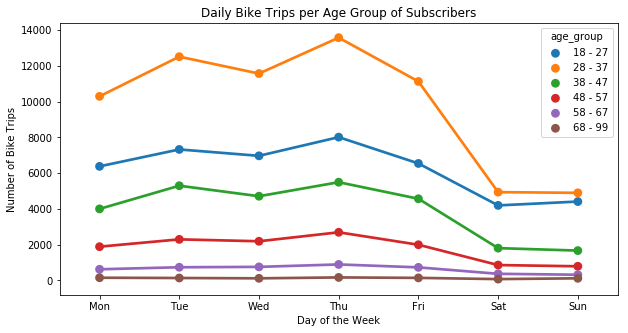

In [5]:
master_df['age_group'] = master_df['member_age'].apply(lambda x: '18 - 27' if 18<=x<=27
                                                 else '28 - 37' if 28<=x<=37
                                                 else '38 - 47' if 38<=x<=47
                                                 else '48 - 57' if 48<=x<=57
                                                 else '58 - 67' if 58<=x<=67
                                                 else '68 - 99' if 68<=x<=99
                                                      else x)

master_df.age_group.value_counts()

age_grp = master_df.query("user_type == 'Subscriber'").groupby(['start_day', 'age_group']).agg({'bike_id':'count'}).reset_index()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = fig)
ax = sb.pointplot(data=age_grp, x='start_day', y='bike_id', hue='age_group', order=days);
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Trips')
plt.title('Daily Bike Trips per Age Group of Subscribers');

## Day and Time is the bike share system is mostly used by each User Type

> Customers mostly use the bikes on weekends whereas subscribers mostly use them on weekdays to commute to and from work.
On weekdays, most bike rides occur between 8-9am and 5-6pm
On weekends, most bike rides occur between 1-2pm

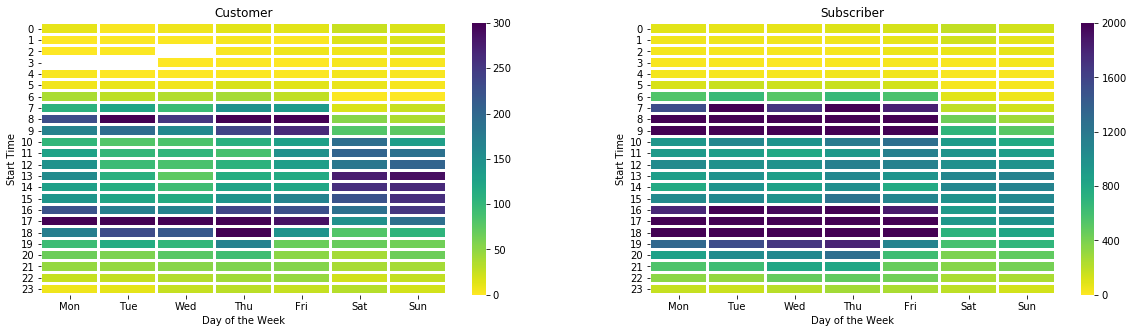

In [6]:
master_df['start_day'] = pd.Categorical(master_df['start_day'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);
customer = master_df.query("user_type == 'Customer'").groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
customer = customer.pivot('start_hour', 'start_day', 'bike_id')

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
sb.heatmap(customer, cmap="viridis_r",linewidths=2, vmax=300, vmin=0)
plt.title('Customer')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time');

subscriber = master_df.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();
subscriber = subscriber.pivot('start_hour', 'start_day', 'bike_id')

plt.subplot(1, 2, 2)
sb.heatmap(subscriber, cmap="viridis_r",linewidths=2, vmax=2000, vmin=0)
plt.title('Subscriber')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time');

## Daily Usage per Gender and User Type

> - The trends for both genders(male and female) is similar for customers and subscribers. 
- The peak for both Customers and Subscribers, as well as both genders is Thursday

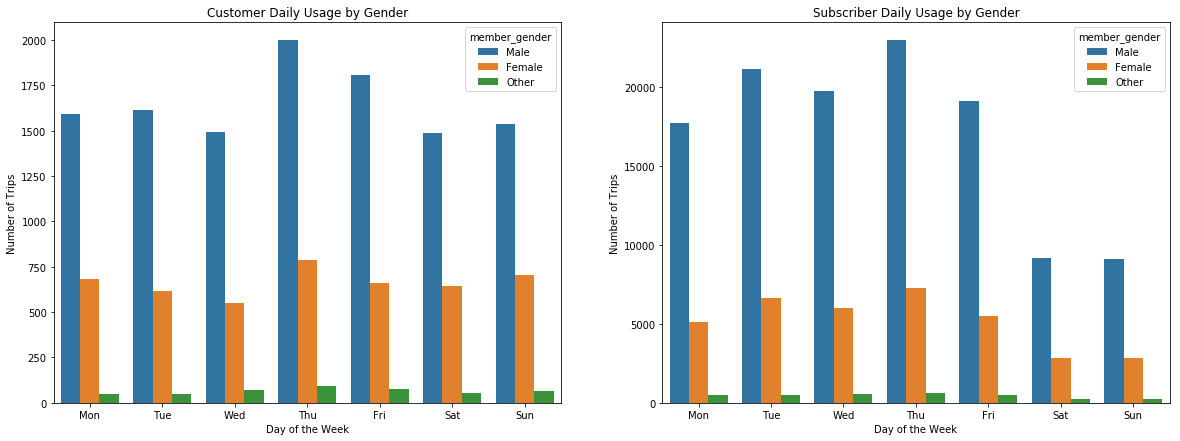

In [7]:
gender = ['Male', 'Female', 'Other']
master_df['member_gender'] = pd.Categorical(master_df['member_gender'], categories= gender, ordered=True);

cust = master_df.query("user_type == 'Customer'")
sub = master_df.query("user_type == 'Subscriber'")



plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
sb.countplot(data=cust, x='start_day', hue='member_gender')
plt.title('Customer Daily Usage by Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips');

plt.subplot(1,2,2)
sb.countplot(data=sub, x='start_day', hue='member_gender')
plt.title('Subscriber Daily Usage by Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 430434 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 